In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
sns.set(style="ticks")
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set_context("paper")
sns.set_context("notebook")

In [2]:
df=pd.read_csv("/Users/gilles/Downloads/covid-deaths-days-since-per-million.csv",parse_dates=[2])
df.columns="Entity Code Date Deaths Year Days".split()

In [3]:
def getTimes(entity,delta=30):
    time2=df[(df.Entity==entity)&(df.Deaths!=0)].Date.max()
    time1=time2-pd.to_timedelta(delta,unit="d")
    return time1,time2

def getDeaths(entity,delta=30):
    time1,time2=getTimes(entity,delta)
    deaths1=df[(df.Entity==entity)&(df.Date<=time1)].Deaths.max()
    deaths2=df[(df.Entity==entity)&(df.Date<=time2)].Deaths.max()
    return deaths1,deaths2

def getDayDelta(entity,day):
    deaths1=df[(df.Entity==entity)&(df.Date<=(day-pd.to_timedelta(1,unit="d")))].Deaths.max()
    deaths2=df[(df.Entity==entity)&(df.Date<=day)].Deaths.max()
    return deaths2-deaths1
    

In [68]:
nbDays=30
entities=["United States","United Kingdom","Brazil",
          "Belgium","France","Italy","Spain",
          "Germany","Portugal","Sweden",
          "Malaysia","Singapore"]
for entity in entities:
    d1,d2=getDeaths(entity,nbDays)
    print entity, d2-d1

United States 149.965
United Kingdom 233.023
Brazil 81.417
Belgium 275.074
France 113.66
Italy 129.636
Spain 133.099
Germany 39.327
Portugal 50.507
Sweden 208.53
Malaysia 0.68
Singapore 2.051


In [101]:
nbDays=10
#entities=["United States","United Kingdom","France","Italy","Spain","Belgium","Brazil"]
dfDeaths=pd.DataFrame(columns=entities)
for entity in entities:
    baseDay=df[(df.Entity==entity)&(df.Deaths!=0)].Date.max()-pd.to_timedelta(nbDays,unit="d")
    print entity
    for numDay in range(nbDays):
        currentDay=baseDay+pd.to_timedelta(numDay,unit="d")
#         print currentDay.strftime('%d/%m/%Y'),getDayDelta(entity,currentDay)
        dfDeaths.loc[currentDay.strftime('%d/%m/%Y'),entity]=getDayDelta(entity,currentDay)

United States
United Kingdom
Brazil
Belgium
France
Italy
Spain
Germany
Portugal
Sweden
Malaysia
Singapore


In [102]:
%matplotlib inline

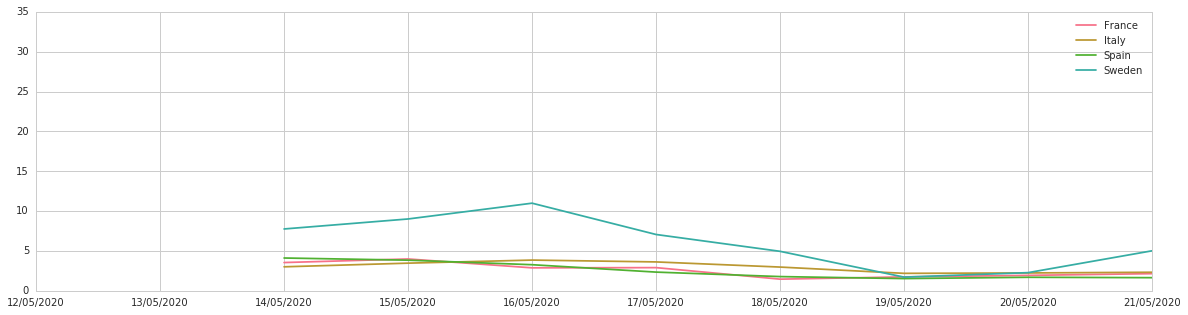

In [103]:
ax=dfDeaths.loc[:,["France","Italy","Spain","Sweden"]].rolling(3).mean().plot(kind="line",figsize=(20,5))
ax.set(ylim=(0,35))
plt.show()

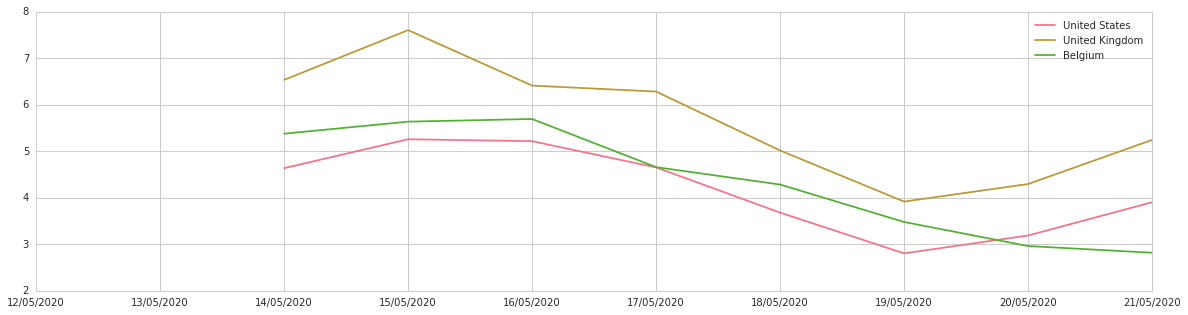

In [104]:
dfDeaths.loc[:,["United States","United Kingdom","Belgium"]].rolling(3).mean().plot(kind="line",figsize=(20,5))

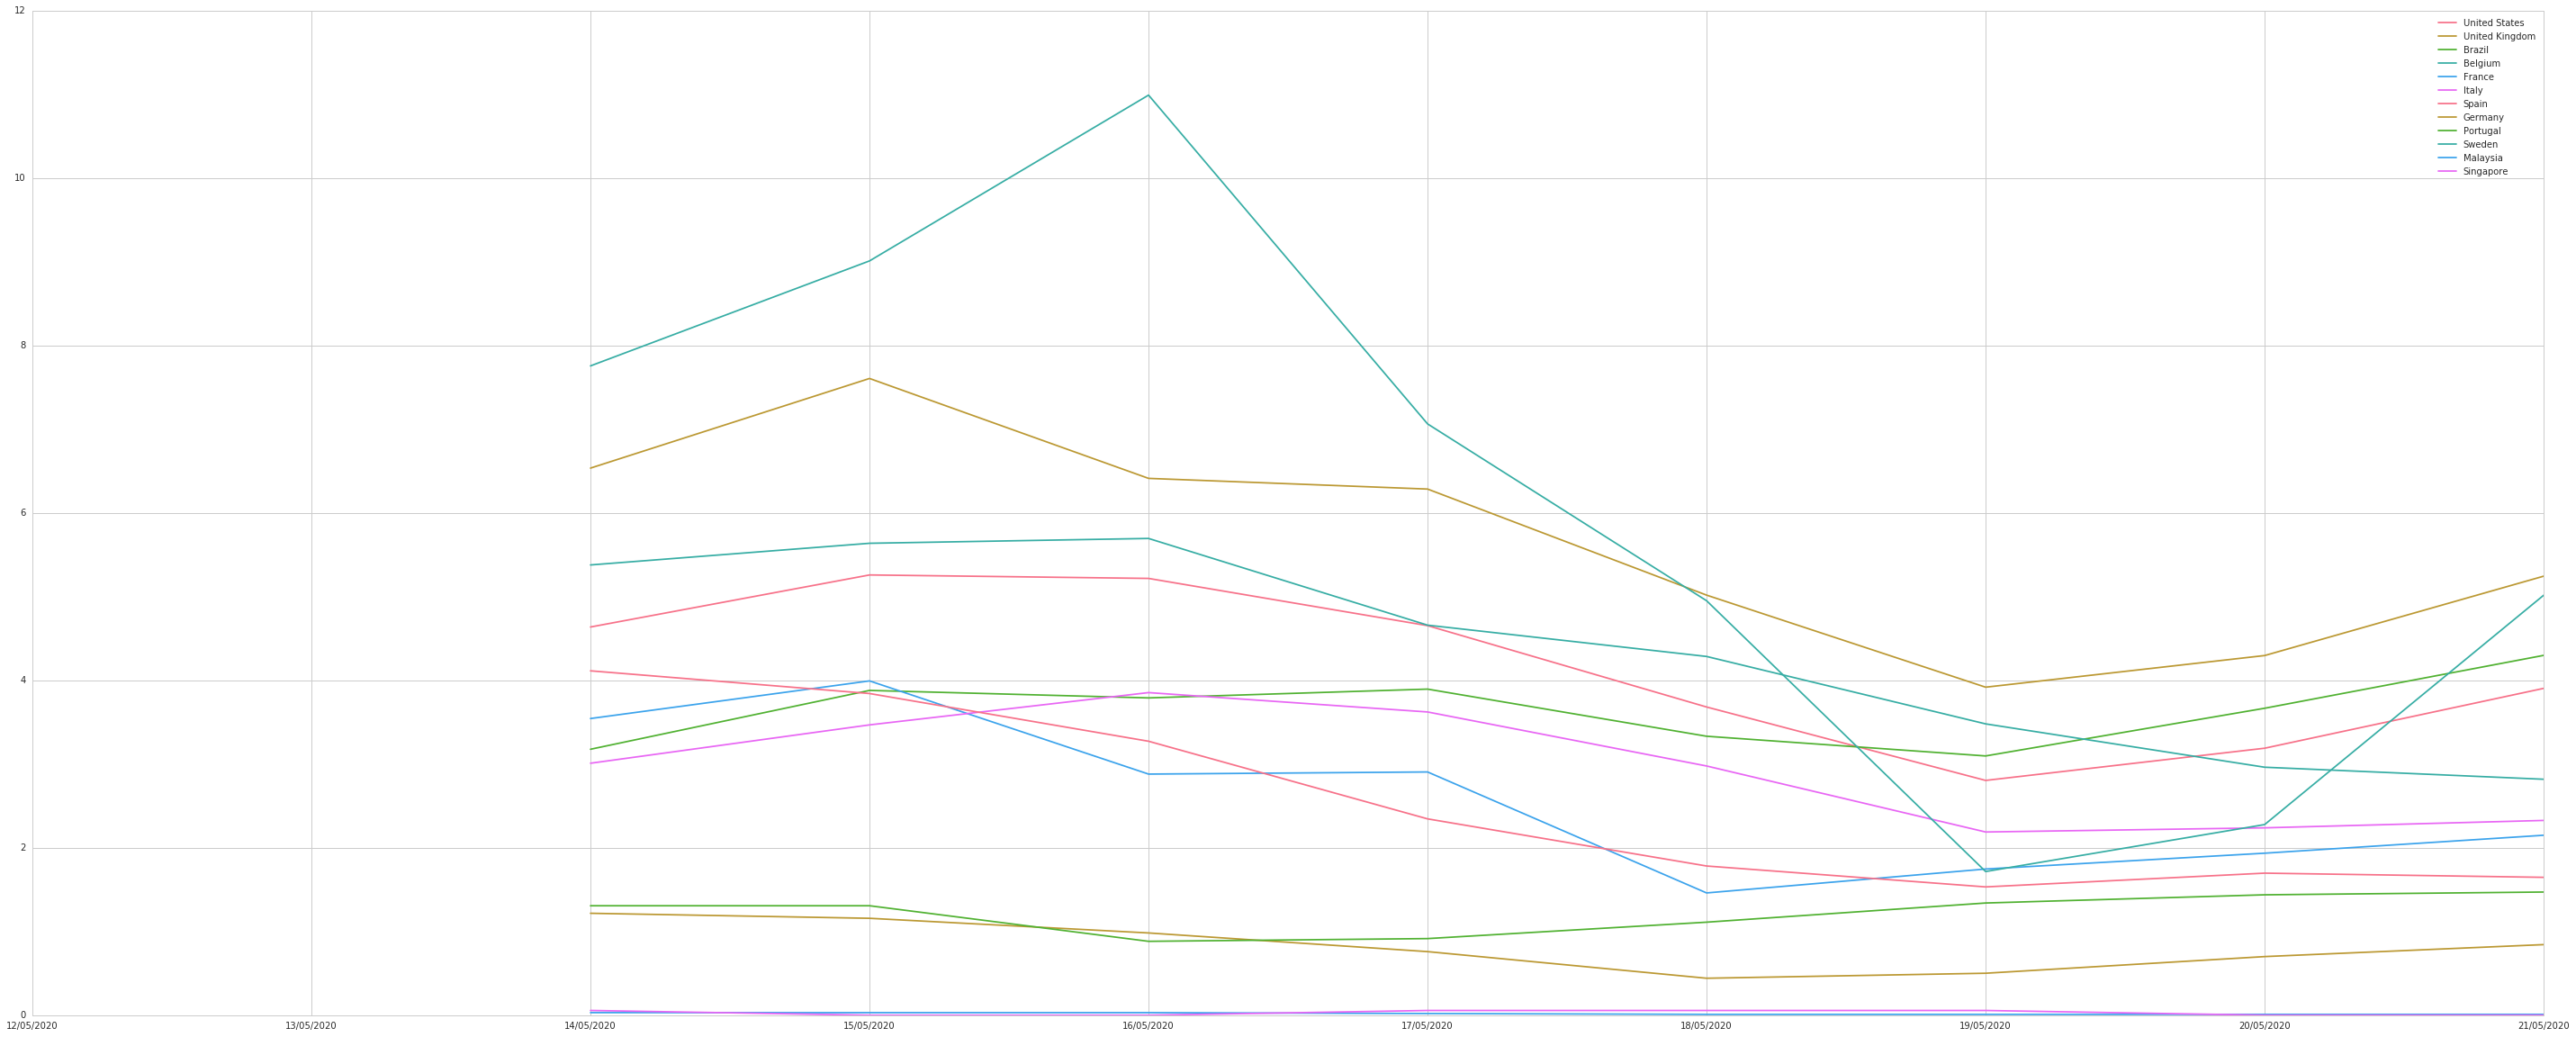

In [105]:
dfDeaths.rolling(3).mean().plot(kind="line",figsize=(50,20))

In [33]:
", ".join(df.Entity.unique().tolist())

"Afghanistan, Africa, Albania, Algeria, Andorra, Angola, Anguilla, Antigua and Barbuda, Argentina, Armenia, Aruba, Asia, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire Sint Eustatius and Saba, Bosnia and Herzegovina, Botswana, Brazil, British Virgin Islands, Brunei, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo, Costa Rica, Cote d'Ivoire, Croatia, Cuba, Curacao, Cyprus, Czech Republic, Democratic Republic of Congo, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Estonia, Ethiopia, Europe, Faeroe Islands, Falkland Islands, Fiji, Finland, France, French Polynesia, Gabon, Gambia, Georgia, Germany, Ghana, Gibraltar, Greece, Greenland, Grenada, Guam, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hungary, Iceland, India